In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os, sys
import numpy as np
import pylab as plt
from scipy.interpolate import griddata
from PIL import Image

from data_tools import *

np.random.seed(9999)

In [2]:
# load a test image
f = load_multilayer_tiff('/Users/pekalmj1/Data/ISBI-2012/train-volume.tif')
print('raw X shape: %s' % str(f.shape))
X = f[0,0, ...]

f = load_multilayer_tiff('/Users/pekalmj1/Data/ISBI-2012/train-labels.tif')
print('raw Y shape: %s' % str(f.shape))
Y = f[0,0,...]

n = X.shape[0]
print('n=%d' % n)

raw X shape: (30, 1, 512, 512)
raw Y shape: (30, 1, 512, 512)
n=512


In [3]:
# create and apply a displacement mesh
omega_xnew, omega_ynew = make_displacement_mesh(n, sigma=20) 

X_new = apply_displacement_mesh(X, omega_xnew, omega_ynew)
print(X_new.shape)

Y_new = apply_displacement_mesh(Y, omega_xnew, omega_ynew)
print(Y_new.shape)
Y_new[np.isnan(Y_new)] = 0;
Y_new[Y_new < 128] = 0;
Y_new[Y_new >= 128] = 255;

# the following variables are just to facilitate plotting
omega_x, omega_y = np.meshgrid(np.arange(n), np.arange(n))
omega_dx = omega_x - omega_xnew
omega_dy = omega_y - omega_ynew

(512, 512)
(512, 512)


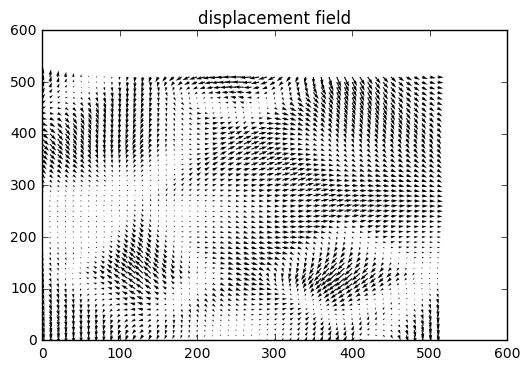

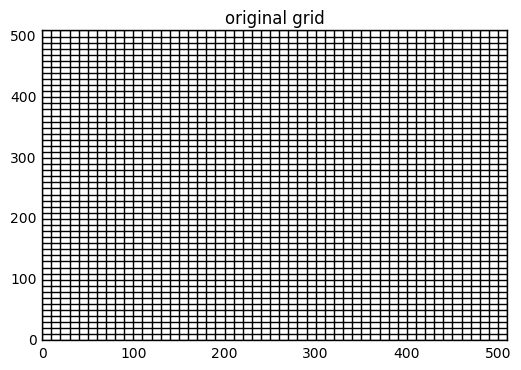

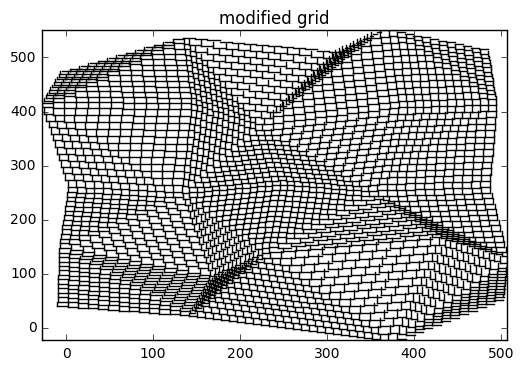

In [4]:
# visualize meshes
subset = lambda M,d:  M[0:512:d, 0:512:d]

plt.quiver(subset(omega_x,10), subset(omega_y,10), subset(omega_dx,10), subset(omega_dy,10))
plt.title('displacement field');

plt.figure()
plot_mesh(subset(omega_x,10), subset(omega_y,10))
plt.title('original grid');

plt.figure()
plot_mesh(subset(omega_xnew,10), subset(omega_ynew,10), 'r-')
plt.title('modified grid');

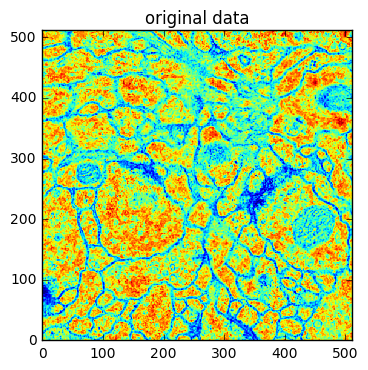

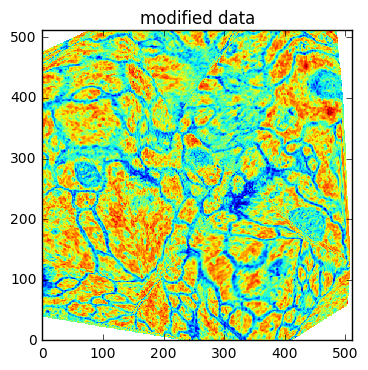

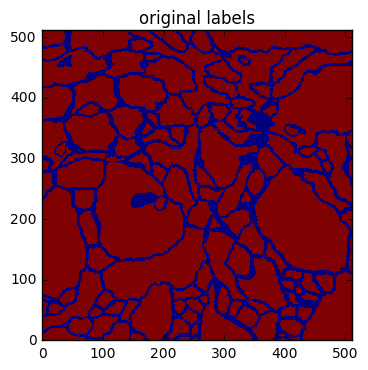

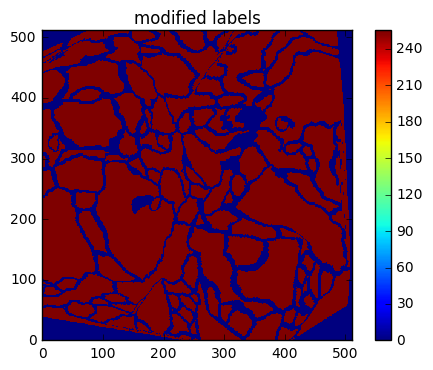

In [5]:
# visualize data
plt.figure()
plt.imshow(X, interpolation='none')
plt.gca().invert_yaxis()
plt.title('original data')

plt.figure()
plt.imshow(X_new, interpolation='none')
plt.gca().invert_yaxis()
plt.title('modified data')

plt.figure()
plt.imshow(Y, interpolation='none')
plt.gca().invert_yaxis()
plt.title('original labels')

plt.figure()
plt.imshow(Y_new, interpolation='none')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('modified labels');